# Bank Customer Churn Exploraty Data Analysis

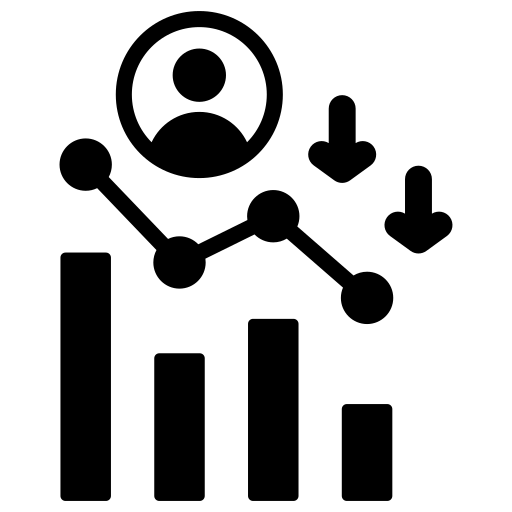

## Description:
For our data, we will use the <a href='https://www.kaggle.com/datasets/saurabhbadole/bank-customer-churn-prediction-dataset/data'>dataset from Kaggel</a>.
This dataset contains information about bank customers and their churn status, which indicates whether they have exited the bank or not. It is suitable for exploring and analyzing factors influencing customer churn in banking institutions and for building predictive models to identify customers at risk of churning.


### Features:
**RowNumber:** The sequential number assigned to each row in the dataset.

**CustomerId:** A unique identifier for each customer.

**Surname:** The surname of the customer.

**CreditScore:** The credit score of the customer.

**Geography:** The geographical location of the customer (e.g., country or region).

**Gender:** The gender of the customer.

**Age: The age of the customer.

**Tenure:** The number of years the customer has been with the bank.

**Balance:** The account balance of the customer.

**NumOfProducts:** The number of bank products the customer has.

**HasCrCard:** Indicates whether the customer has a credit card (binary: yes/no).

**IsActiveMember:** Indicates whether the customer is an active member (binary: yes/no).

**EstimatedSalary:** The estimated salary of the customer.

**Exited:** Indicates whether the customer has exited the bank (binary: yes/no).

### Import Laibraries

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from matplotlib import pyplot as plt
import seaborn as sns
import warnings

### Understanding the Dataset
**1. Load the data**

In [2]:
file_path = '../PythonForDA/BankingDataset/Churn_Modelling.csv'

In [3]:
df = pd.read_csv(file_path)

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**2.Check dataset information**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [7]:
# describe for numerical column 
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
# describe category columns 
df.describe(include='O')

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


### Data Cleaning

**3. Drop not useful column**

In [9]:
df.drop(columns=['RowNumber'],inplace=True)

In [10]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**4. Identify missing values using**

In [11]:
df.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

**5. Check for duplicates**

In [12]:
df.duplicated().sum()

0

**5.Identify unique categories in a categorical column**

In [13]:
print(df['Gender'].unique())

['Female' 'Male']


### Data Analysis

**What is the distribution of churned vs. non-churned customers?**

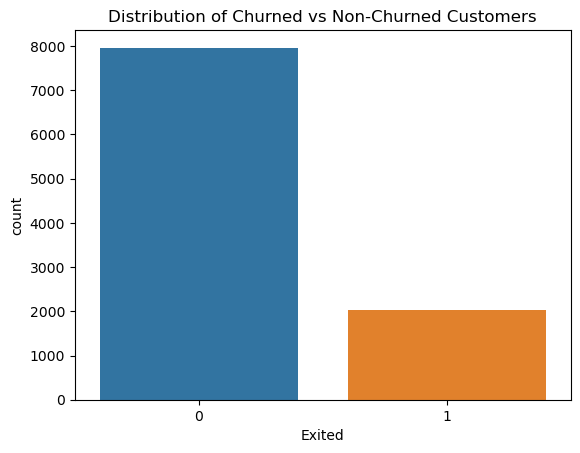

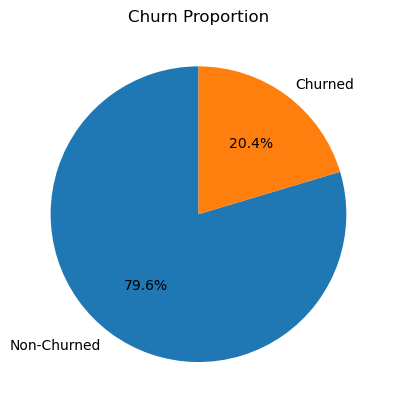

In [14]:
# Bar plot
sns.countplot(data=df, x='Exited')
plt.title('Distribution of Churned vs Non-Churned Customers')
plt.show()

# Pie chart
df['Exited'].value_counts().plot.pie(autopct='%1.1f%%', labels=['Non-Churned', 'Churned'], startangle=90)
plt.title('Churn Proportion')
plt.ylabel('')
plt.show()

 **Does age influence customer churn?**

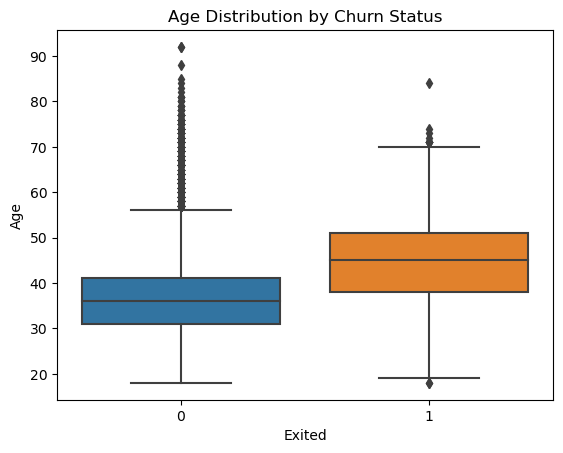

In [15]:
sns.boxplot(data=df, x='Exited', y='Age')
plt.title('Age Distribution by Churn Status')
plt.show()

**Which geographic region has the highest churn rate?**

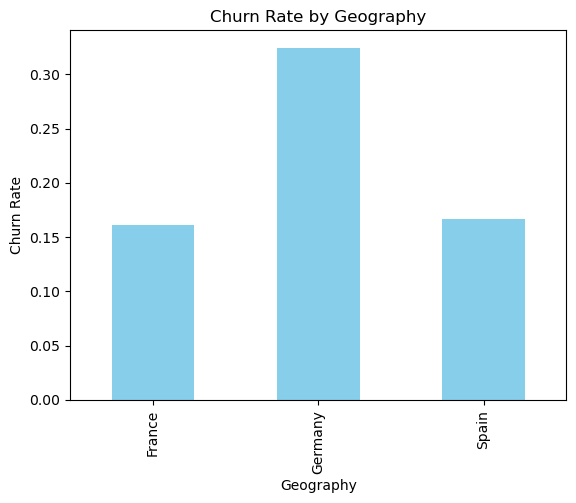

In [16]:
region_churn = df.groupby('Geography')['Exited'].mean()
region_churn.plot(kind='bar', color='skyblue')
plt.title('Churn Rate by Geography')
plt.ylabel('Churn Rate')
plt.show()

**Do customers with higher account balances churn less?**

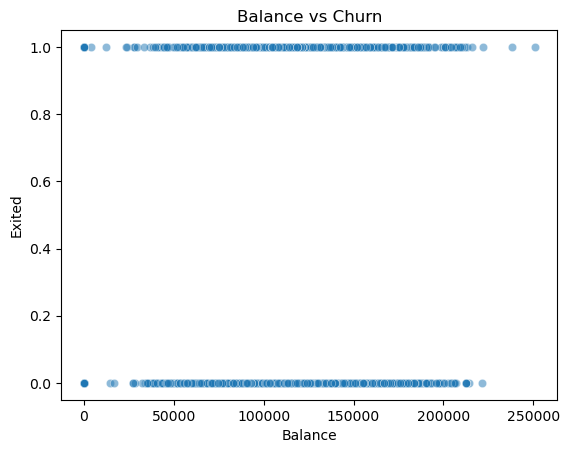

In [17]:
sns.scatterplot(data=df, x='Balance', y='Exited', alpha=0.5)
plt.title('Balance vs Churn')
plt.show()

**How does gender impact churn?**

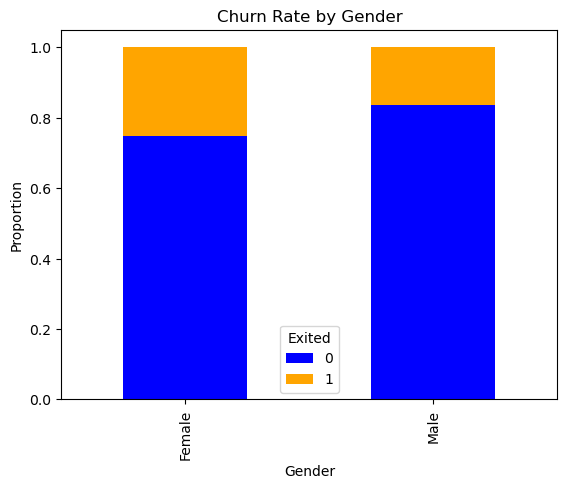

In [18]:
gender_churn = df.groupby('Gender')['Exited'].value_counts(normalize=True).unstack()
gender_churn.plot(kind='bar', stacked=True, color=['blue', 'orange'])
plt.title('Churn Rate by Gender')
plt.ylabel('Proportion')
plt.show()


**What is the relationship between the number of products and churn?**

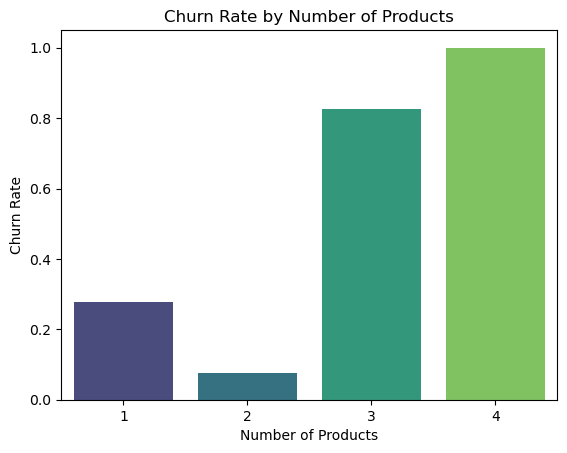

In [19]:
products_churn = df.groupby('NumOfProducts')['Exited'].mean().reset_index()
sns.barplot(data=products_churn, x='NumOfProducts', y='Exited', palette='viridis')
plt.title('Churn Rate by Number of Products')
plt.ylabel('Churn Rate')
plt.xlabel('Number of Products')
plt.show()

 **Relationship between Age and EstimatedSalary or Balance - Correlation Heatmap**

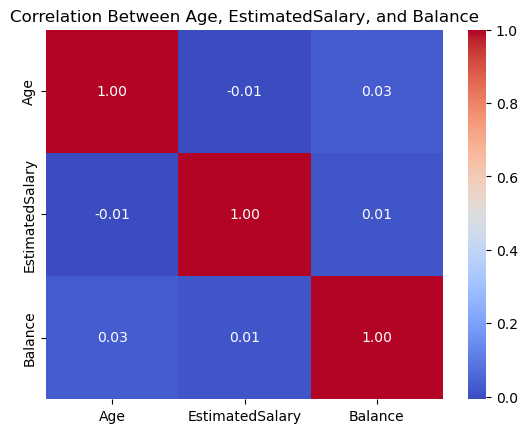

In [20]:
corr_matrix = df[['Age', 'EstimatedSalary', 'Balance']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Age, EstimatedSalary, and Balance')
plt.show()


**Does Credit Score Correlate with Churn?**

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


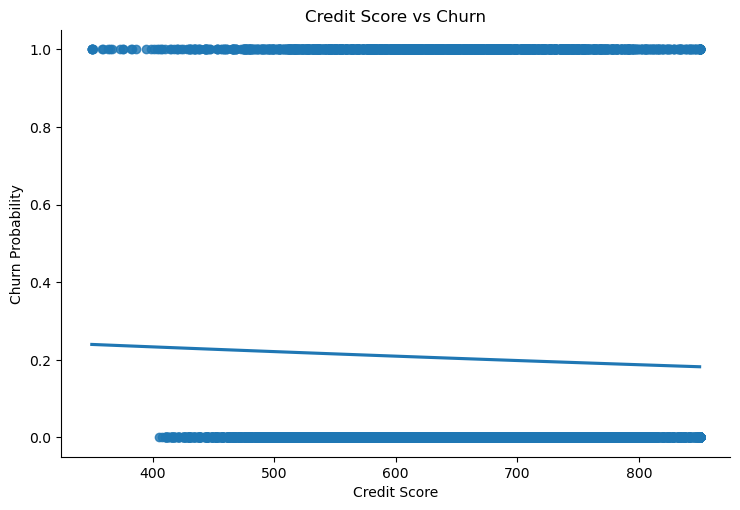

In [21]:
# Scatter plot with regression line
sns.lmplot(data=df, x='CreditScore', y='Exited', logistic=True, height=5, aspect=1.5, ci=None)
plt.title('Credit Score vs Churn')
plt.xlabel('Credit Score')
plt.ylabel('Churn Probability')
plt.show()

Weak Correlation: The flat regression line suggests that there is little to no correlation between credit score and churn. Credit score alone is not a significant predictor of whether a customer will churn.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


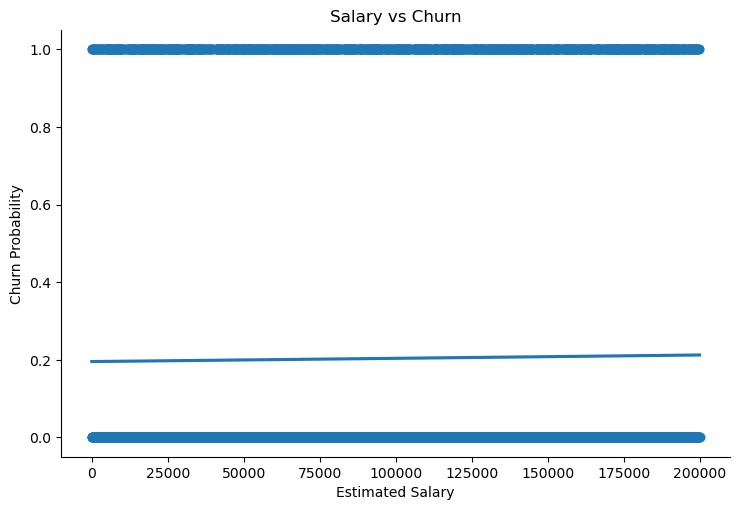

In [22]:
sns.lmplot(data=df, x='EstimatedSalary', y='Exited', logistic=True, height=5, aspect=1.5, ci=None)
plt.title('Salary vs Churn')
plt.xlabel('Estimated Salary')
plt.ylabel('Churn Probability')
plt.show()

The logistic regression line is nearly flat, indicating that there is no strong relationship between the Estimated Salary and the probability of churn.

**Are Customers with Certain Salaries More Likely to Churn?**

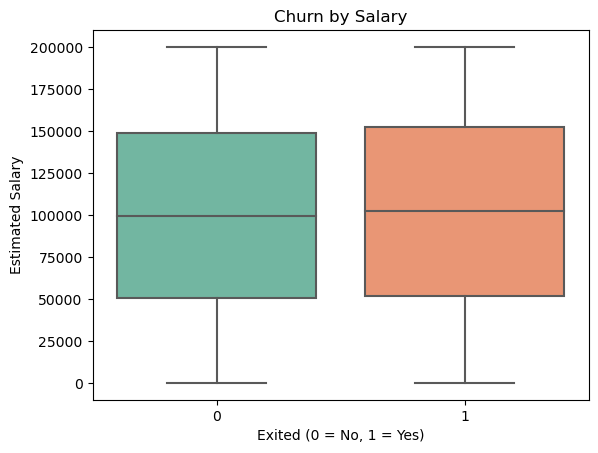

In [23]:
# Boxplot for EstimatedSalary and Churn
sns.boxplot(data=df, x='Exited', y='EstimatedSalary', palette='Set2')
plt.title('Churn by Salary')
plt.xlabel('Exited (0 = No, 1 = Yes)')
plt.ylabel('Estimated Salary')
plt.show()

**The numerical column distributions**

In [24]:
# Differentiating Data Columns
numerical_cols = ['Age', 'CreditScore',  'Balance', 'EstimatedSalary']
categorical_cols = ['Country' , 'Gender', 'Tenure', 'Products_number', 'Active_member']
target_col = 'Churn'

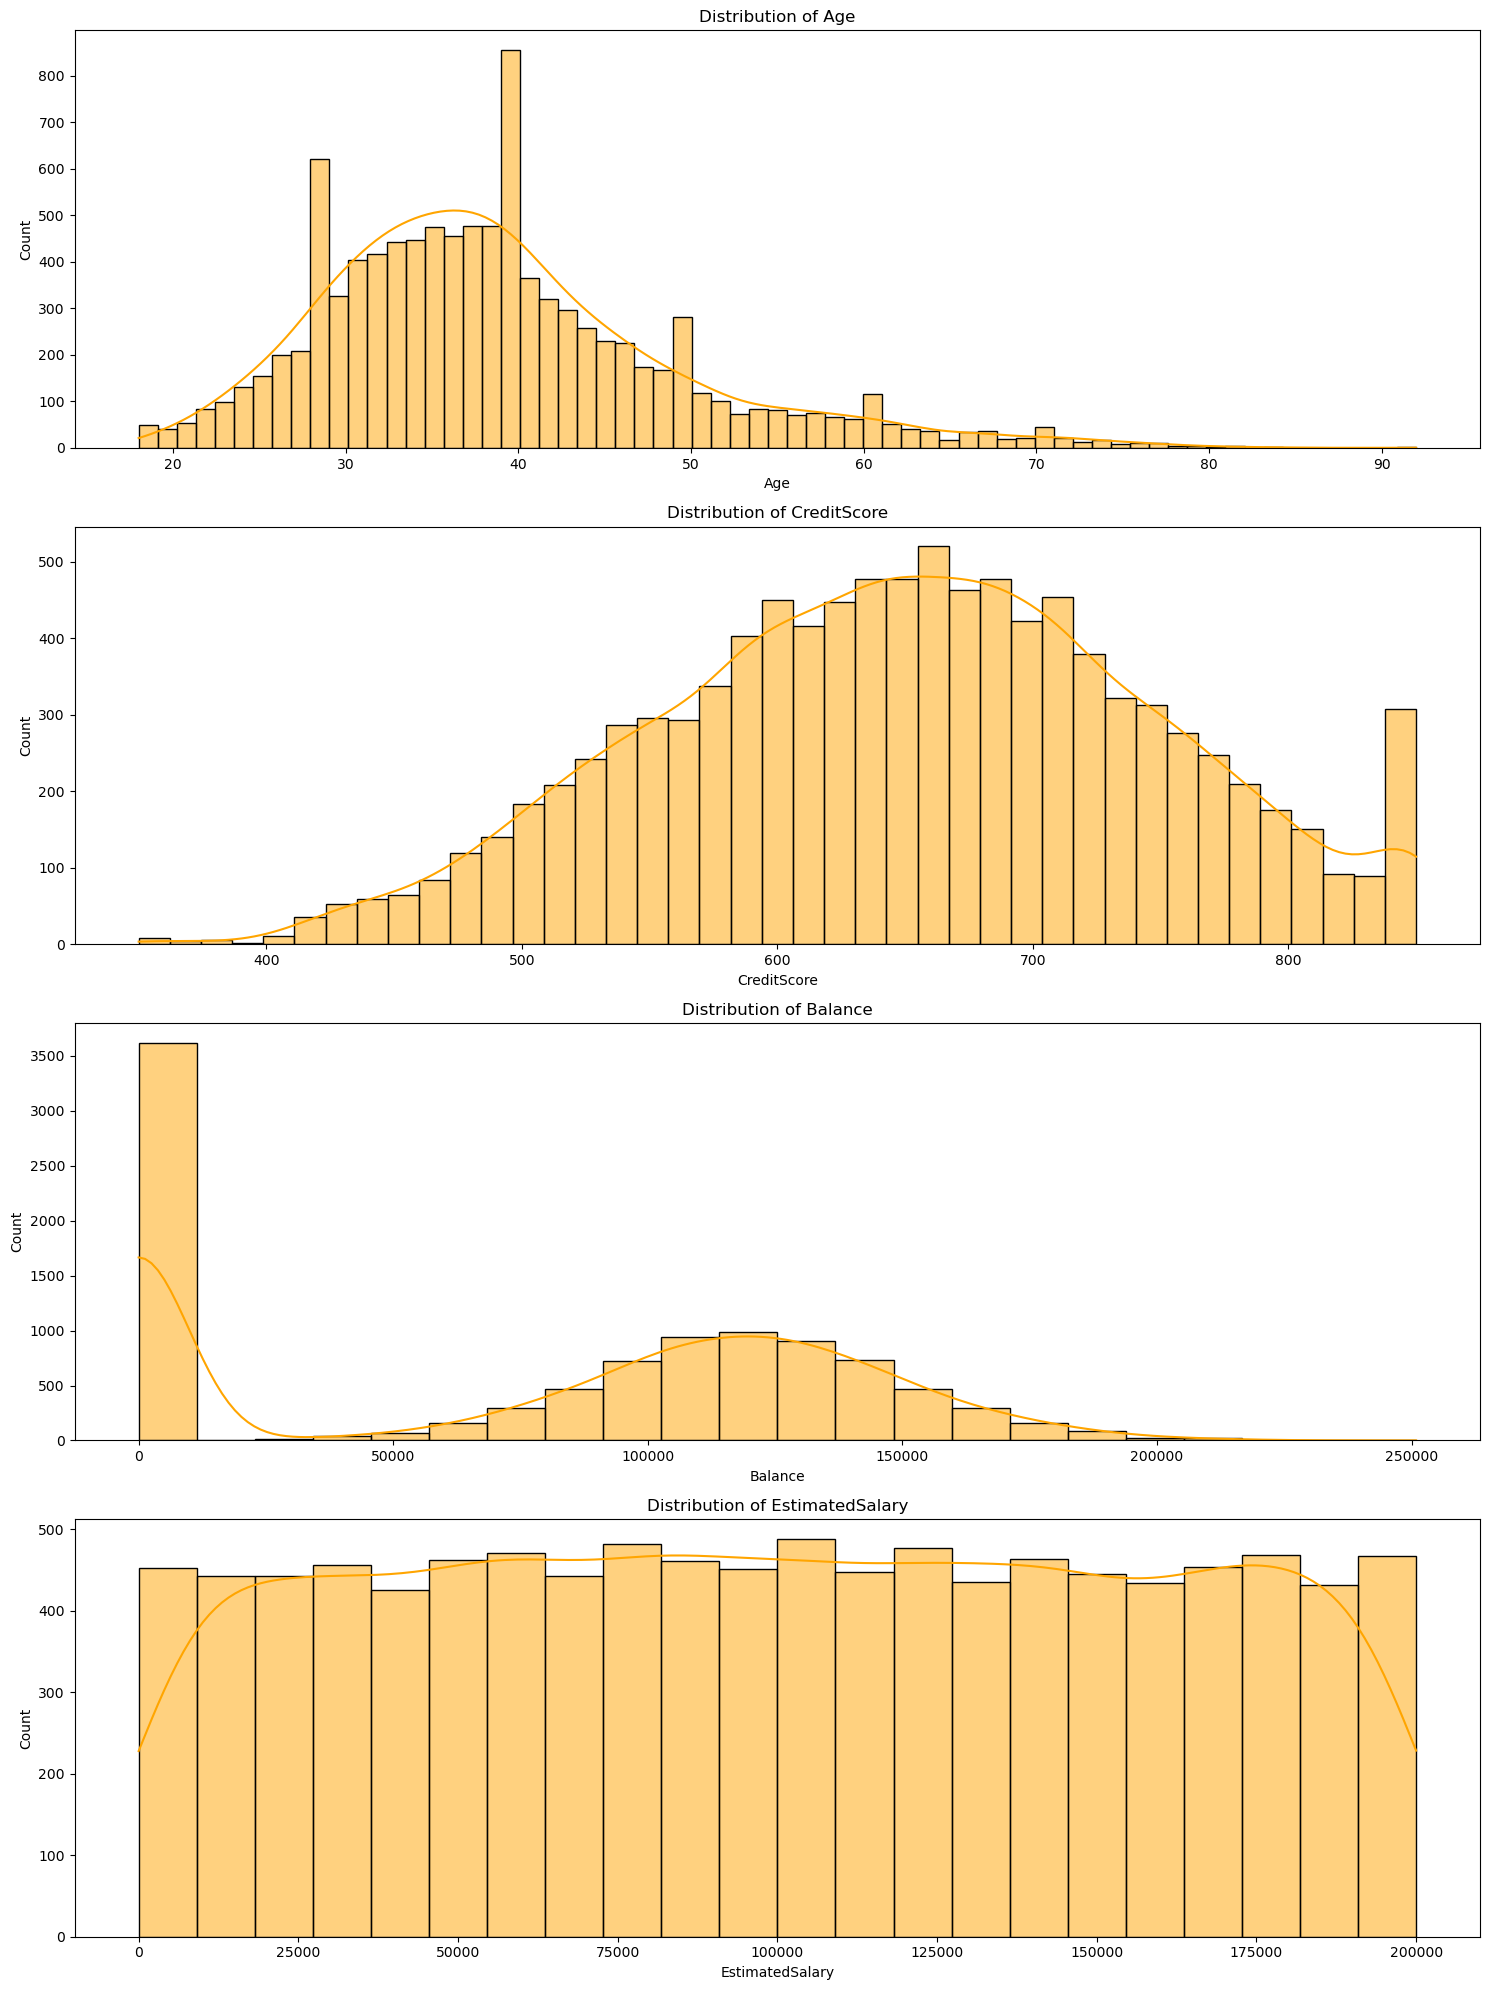

In [25]:
# Define the number of numerical columns
num_cols = len(numerical_cols)

# Create subplots
fig, axes = plt.subplots(num_cols, 1, figsize=(15, 5 * num_cols))

# Iterate through columns and plot
for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, ax=axes[i], color='orange')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

**Conclusion:**
Age Distribution: The majority of customers fall into specific age ranges, with a notable peak around a certain age group. This indicates a potential target demographic for marketing or retention strategies.

Credit Score and Churn: The scatter plot with a regression line suggests a weak or no significant correlation between credit scores and churn probability. Customers with low or high credit scores seem equally likely to churn.

Estimated Salary and Churn: The analysis shows no clear relationship between estimated salaries and churn probability. Churn occurs across all salary ranges, indicating other factors might be more influential in predicting churn.

Balance and Age Trends: Customers’ average balance changes with age, showing a gradual increase or fluctuation in savings or spending habits over time. However, this may not directly influence churn without further analysis.

Insights for Retention: Since age is a key variable with noticeable trends, segmentation strategies based on age groups could be beneficial. Additionally, further investigation into other features like geography, product usage, or customer feedback might reveal stronger churn predictors.
